In [ ]:
# encoding=utf8

In [2]:
!pip install fix_yahoo_finance

  Running setup.py bdist_wheel for fix-yahoo-finance ... - \ done
  Stored in directory: /Users/bater.makhabel/Library/Caches/pip/wheels/fe/70/46/0b255aeca0ebf7b9dc524858f9dd3f6158ef7fc61bd3397483
  Running setup.py bdist_wheel for multitasking ... - \ done
  Stored in directory: /Users/bater.makhabel/Library/Caches/pip/wheels/67/18/f1/08c02151f0805ee1c07928848e42ec50bfd33654aa0f566c38
Successfully built fix-yahoo-finance multitasking
You are using pip version 9.0.1, however version 9.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# 特征工程-线性特征变换-因子分析(Factor Analysis,FA)



[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


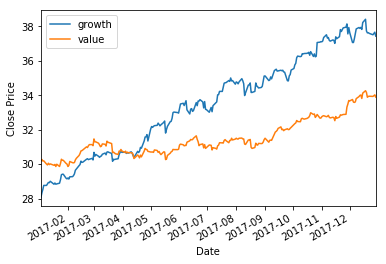

In [3]:
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
growth_fund = yf.download('TPLGX','2017-01-01','2018-01-01')
growth_fund.Close.plot()
value_fund = yf.download('VHDYX','2017-01-01','2018-01-01')
value_fund.Close.plot()
plt.legend(['growth','value'])
plt.ylabel('Close Price')
plt.show()

In [4]:
growth_fund = yf.download('TPLGX','2006-12-01','2018-01-01',interval='1mo')
value_fund = yf.download('VHDYX','2006-12-01','2018-01-01',interval='1mo')
growth_fund['Returns'] =  np.log(growth_fund['Adj Close'] / growth_fund['Adj Close'].shift(1)) *100
value_fund['Returns'] =  np.log(value_fund['Adj Close'] / value_fund['Adj Close'].shift(1)) *100
growth_fund = growth_fund.dropna()
value_fund = value_fund.dropna()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [5]:
fama_factors = pd.read_csv('FF_Factors.csv',names=['Mkt-RF','SMB','HML','RF'])
growth_fund['MKT RF'] = list(fama_factors['Mkt-RF'][1:]);growth_fund['SMB'] = list(fama_factors['SMB'][1:]);
growth_fund['HML'] = list(fama_factors['HML'][1:]); growth_fund['RF'] = list(fama_factors['RF'][1:]) 
growth_fund['Excess Returns'] = [float(list(growth_fund.Returns)[i]) - float(list(growth_fund.RF)[i]) for i in range(len(growth_fund.Returns))]
value_fund['MKT RF'] = list(fama_factors['Mkt-RF'][1:]);value_fund['SMB'] = list(fama_factors['SMB'][1:]);
value_fund['HML'] = list(fama_factors['HML'][1:]); value_fund['RF'] = list(fama_factors['RF'][1:]) 
value_fund['Excess Returns'] = [float(list(value_fund.Returns)[i]) - float(list(value_fund.RF)[i]) for i in range(len(value_fund.Returns))]

FileNotFoundError: File b'FF_Factors.csv' does not exist

In [ ]:
growth_fund.head()

In [ ]:
value_fund.head()

In [ ]:
y = growth_fund['Excess Returns']
X = growth_fund.ix[:,[7,8,9]]
X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())

In [ ]:
results.pvalues['const']

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig = fig)
plt.show()

In [ ]:
y = value_fund['Excess Returns']
X = value_fund.ix[:,[7,8,9]]
X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())

In [ ]:
results.pvalues['const']

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig = fig)
plt.show()